In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lammps_logfile as lmplog
from copy import deepcopy

In [2]:
# load colvar file to ananlyze the dihedrals
colvar_file = np.loadtxt('dihedral.dat' )

# Load test dihedrals 
dihedrals_test = np.loadtxt('dihedrals_test_data.txt' )

FileNotFoundError: dihedrals_test_data.txt not found.

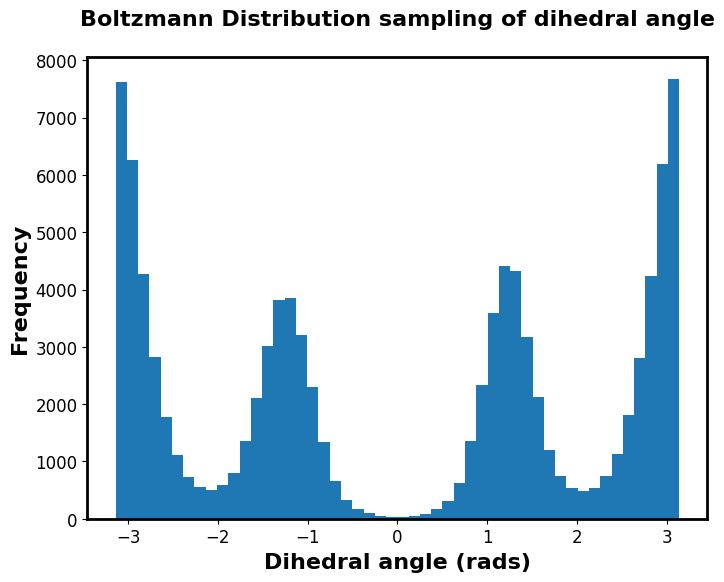

In [5]:
# Concatenating all the samples into a single array
# all_samples = []
# time = []
# for value in selected_dict.values():
#     all_samples.extend(value['dihedrals'])
#     time.extend(value['Time (fs)'])

plt.figure(figsize=(8,6))
# Creating a histogram
plt.hist(colvar_file[:,1], bins=50,density=False)  # You can adjust the number of bins as desired

# Adding labels and title to the plot
plt.title('Boltzmann Distribution sampling of dihedral angle\n',fontsize=16, fontweight='bold')
plt.xlabel('Dihedral angle (rads)',fontsize=16, fontweight='bold')
plt.ylabel('Frequency',fontsize=16, fontweight='bold')
#plt.xlim(-np.pi, np.pi)
# Displaying the plot

# Increase size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


plt.show()

In [4]:
# Create an array with linspace from -pi to pi with 30 points. to create the cv space

cv_space = np.linspace(-np.pi, np.pi, 51)
cv_space

array([-3.14159265e+00, -3.01592895e+00, -2.89026524e+00, -2.76460154e+00,
       -2.63893783e+00, -2.51327412e+00, -2.38761042e+00, -2.26194671e+00,
       -2.13628300e+00, -2.01061930e+00, -1.88495559e+00, -1.75929189e+00,
       -1.63362818e+00, -1.50796447e+00, -1.38230077e+00, -1.25663706e+00,
       -1.13097336e+00, -1.00530965e+00, -8.79645943e-01, -7.53982237e-01,
       -6.28318531e-01, -5.02654825e-01, -3.76991118e-01, -2.51327412e-01,
       -1.25663706e-01,  4.44089210e-16,  1.25663706e-01,  2.51327412e-01,
        3.76991118e-01,  5.02654825e-01,  6.28318531e-01,  7.53982237e-01,
        8.79645943e-01,  1.00530965e+00,  1.13097336e+00,  1.25663706e+00,
        1.38230077e+00,  1.50796447e+00,  1.63362818e+00,  1.75929189e+00,
        1.88495559e+00,  2.01061930e+00,  2.13628300e+00,  2.26194671e+00,
        2.38761042e+00,  2.51327412e+00,  2.63893783e+00,  2.76460154e+00,
        2.89026524e+00,  3.01592895e+00,  3.14159265e+00])

In [5]:
# Assuming 'colvar_file' and 'cv_space' are already defined
# Replace 'n' with the desired number of values to select
n = 10

np.random.seed(165189)

# Create an empty dictionary to store the selected values
selected_dict = {}
selected_indices_list = []
selected_values_list = []

# Iterate over the range of len(cv_space)
for i in range(len(cv_space)-1):
    # Generate valid indices within the range of 'colvar_file' for the current cv_space interval
    valid_indices = np.where(
        (colvar_file[:, 1] >= cv_space[i]) & (colvar_file[:, 1] <= cv_space[i+1])
    )[0]
    
#print(valid_indices)
    
    # Select 'n' random indices from the valid indices
    selected_indices = np.random.choice(valid_indices, size=n, replace=False)
#print(selected_indices)
#     #     # Store the valid indices in a list
    selected_indices_list.append(selected_indices)

#     # Retrieve the corresponding values from 'colvar_file'
    selected_values = colvar_file[selected_indices]
# print(selected_indices)
# print(selected_values)
    #Store 
    selected_values_list.append(selected_values[:,0])

    # Create a key for the current cv_space interval
    key = f"{cv_space[i]}"

    # Add the selected values to the dictionary under the key
    selected_dict[key] = {'Index': selected_indices,
                        'Time (fs)': selected_values[:, 0],
                          'dihedrals': selected_values[:, 1]}

# Print the selected dictionary
print(selected_dict)


{'-3.141592653589793': {'Index': array([95137, 97990, 60649, 40819, 52499, 55567, 66895, 42302, 21900,
       47538]), 'Time (fs)': array([1902.74, 1959.8 , 1212.98,  816.38, 1049.98, 1111.34, 1337.9 ,
        846.04,  438.  ,  950.76]), 'dihedrals': array([-3.13294 , -3.025687, -3.120036, -3.107553, -3.133944, -3.034179,
       -3.114591, -3.136022, -3.016123, -3.07376 ])}, '-3.015928947446201': {'Index': array([52196, 60712, 27738, 83826, 18173, 90474,  9299, 91033, 90264,
       94432]), 'Time (fs)': array([1043.92, 1214.24,  554.76, 1676.52,  363.46, 1809.48,  185.98,
       1820.66, 1805.28, 1888.64]), 'dihedrals': array([-2.958601, -2.988647, -2.933711, -2.992203, -2.987224, -2.956045,
       -3.010576, -2.908666, -2.990915, -2.932812])}, '-2.8902652413026098': {'Index': array([ 9145, 63782, 90519, 19432, 45752, 46484, 88805, 45277, 79637,
       42643]), 'Time (fs)': array([ 182.9 , 1275.64, 1810.38,  388.64,  915.04,  929.68, 1776.1 ,
        905.54, 1592.74,  852.86]), 'dihedr

In [6]:
len(selected_indices)

10

In [7]:
selected_dict.keys()

dict_keys(['-3.141592653589793', '-3.015928947446201', '-2.8902652413026098', '-2.764601535159018', '-2.6389378290154264', '-2.5132741228718345', '-2.3876104167282426', '-2.2619467105846507', '-2.1362830044410592', '-2.0106192982974678', '-1.8849555921538759', '-1.759291886010284', '-1.6336281798666923', '-1.5079644737231006', '-1.3823007675795087', '-1.256637061435917', '-1.1309733552923253', '-1.0053096491487334', '-0.879645943005142', '-0.7539822368615501', '-0.6283185307179586', '-0.5026548245743667', '-0.3769911184307748', '-0.25132741228718336', '-0.12566370614359146', '4.440892098500626e-16', '0.1256637061435919', '0.2513274122871838', '0.3769911184307757', '0.5026548245743672', '0.6283185307179591', '0.7539822368615505', '0.8796459430051424', '1.0053096491487343', '1.1309733552923262', '1.2566370614359172', '1.3823007675795091', '1.507964473723101', '1.633628179866693', '1.7592918860102849', '1.8849555921538759', '2.0106192982974678', '2.1362830044410597', '2.2619467105846516',

In [8]:
selected_dict['-3.141592653589793']

{'Index': array([95137, 97990, 60649, 40819, 52499, 55567, 66895, 42302, 21900,
        47538]),
 'Time (fs)': array([1902.74, 1959.8 , 1212.98,  816.38, 1049.98, 1111.34, 1337.9 ,
         846.04,  438.  ,  950.76]),
 'dihedrals': array([-3.13294 , -3.025687, -3.120036, -3.107553, -3.133944, -3.034179,
        -3.114591, -3.136022, -3.016123, -3.07376 ])}

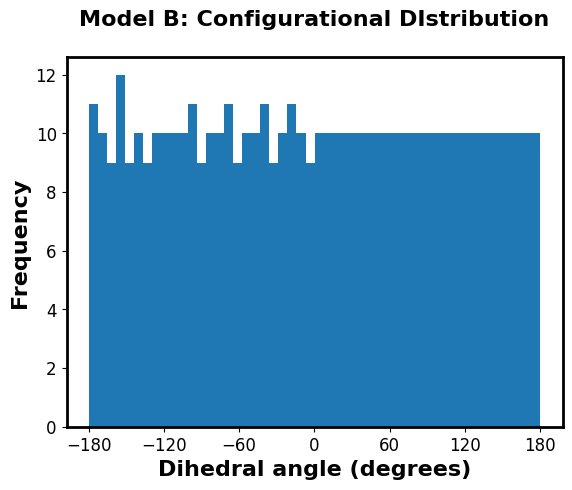

In [9]:
# Concatenating all the samples into a single array
all_samples = []
time = []
for value in selected_dict.values():
    all_samples.extend(value['dihedrals'])
    time.extend(value['Time (fs)'])

# Creating a histogram
plt.hist(np.rad2deg(all_samples), bins=50,density=False)  # You can adjust the number of bins as desired

# Adding labels and title to the plot
plt.title('Model B: Configurational DIstribution\n',fontsize=16, fontweight='bold')
plt.xlabel('Dihedral angle (degrees)',fontsize=16, fontweight='bold')
plt.ylabel('Frequency',fontsize=16, fontweight='bold')
#plt.xlim(-np.pi, np.pi)
# Displaying the plot

# Increase size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(np.arange(-180, 180+60, step=60))
# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Save the figure
plt.savefig('butane_uniform_histogram.png', dpi=400, bbox_inches='tight')
plt.show()




In [10]:
len(all_samples)

500

In [11]:
# np.savetxt('dihedrals_BD.txt',np.rad2deg(diheds_200K[500:1500]))
np.savetxt('dihedrals_UD.txt',np.rad2deg(all_samples))

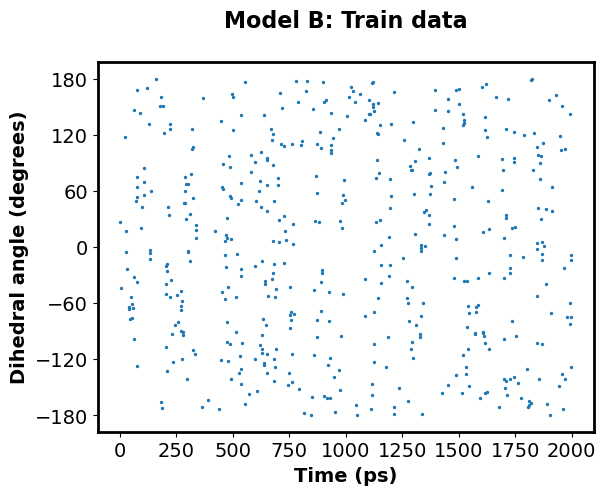

In [29]:
#Plot a scatter plot of the dihedral angles
plt.title('Model B: Train data\n', fontsize=16, fontweight='bold')
plt.scatter(time, np.rad2deg(all_samples), s=2)
#plt.scatter(dihedrals_test[:,0],dihedrals_test[:,1], s=2)
plt.xlabel('Time (ps)', fontsize=14, fontweight='bold')
plt.ylabel('Dihedral angle (degrees)', fontsize=14, fontweight='bold')
plt.yticks(np.arange(-180, 180+60, step=60))
# Increase the font size of the tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Save the figure
plt.savefig('butane_uniform_TrainTest.png', dpi=400, bbox_inches='tight')
plt.show()

In [15]:
# Create array of values and indices 
values=np.array(selected_values_list)
indices = np.array(selected_indices_list)

## Loop over every item in the values and indices list to checkj no duplicates 


for i in range(len(values)):
    for j in range(len(values)):
        if i != j:
            if np.array_equal(values[i], values[j]):
                print(f'Duplicate found. It is {values[i]}')
                

for i in range(len(indices)):
    for j in range(len(indices)):
        if i != j:
            if np.array_equal(indices[i], indices[j]):
                print(f'Duplicate found. It is {indices[i]}')

In [16]:
# load the lammps log file 
lmp_log = lmplog.File('butane_nvt_prod.log')

In [17]:
# Get the step and potential energy from the log file
step = lmp_log.get('Step')
epot = lmp_log.get('PotEng')

In [18]:
step_selected = step[np.array(selected_indices_list).flatten()]
len(step_selected)

500

In [19]:
# Create a pands dataframe with the selected indices
df_selected = pd.DataFrame({ 'Index': np.array(selected_indices_list).flatten(),
                   'Time (fs)': step[np.array(selected_indices_list).flatten()], 
                   'PotEng (kcal/mol)': epot[np.array(selected_indices_list).flatten()]})

df_selected

,Index,Time (fs),PotEng (kcal/mol)
0,95137,1902740.0,23.178153
1,97990,1959800.0,15.500944
2,60649,1212980.0,30.583214
3,40819,816380.0,27.123243
4,52499,1049980.0,22.679420
...,...,...,...
495,90891,1817820.0,21.924266
496,41517,830340.0,27.194323
497,55958,1119160.0,31.041658
498,81122,1622440.0,19.891546


In [20]:
# Define an array to store the energies.

energies = df_selected['PotEng (kcal/mol)'].values
energies.shape

(500,)

In [21]:
# Load the trajectory file to parse it and create a dictionary which key is the index. 
filename = 'forces.dump'

In [22]:
import re
df_selected['Index'].values

array([95137, 97990, 60649, 40819, 52499, 55567, 66895, 42302, 21900,
       47538, 52196, 60712, 27738, 83826, 18173, 90474,  9299, 91033,
       90264, 94432,  9145, 63782, 90519, 19432, 45752, 46484, 88805,
       45277, 79637, 42643, 39770, 55854, 28638, 71224, 75785, 48711,
       30407, 80798, 81212, 85601, 85222, 88099, 72522, 77363, 37267,
       55765, 61774, 26867, 38117, 97257, 34134, 98573, 92678, 14982,
       85036, 24604, 86316, 85337, 87180, 47465, 90027, 48565, 97788,
       26343, 10435, 76517, 37542, 74334, 32531, 26782, 56347, 58956,
       11711, 32029, 99829,  3881, 76674, 46022, 34278, 32004, 13855,
       29920, 43073, 23860, 75904, 22318, 26545, 46439, 34131, 64782,
       31550, 34534, 16164, 64498, 76970, 32525, 16695, 81714, 38174,
       31556, 23702, 92272, 93358, 64742, 80688, 26969, 24341, 10247,
       31074, 56345, 84924, 66384, 31515, 14006, 49029,  3188, 43543,
       80676, 59396, 87669, 13596, 80283, 11621, 78642, 66427, 78612,
       13915, 37619,

In [23]:
# Initialize the data dictionary
data = {}

# Open the file
with open(filename, 'r') as f:
    # Read the file line by line
    for line in f:
        # Check if the line starts with 'ITEM: TIMESTEP'
        if line.startswith('ITEM: TIMESTEP'):
            # Extract the timestep number
            timestep = int(next(f))
                                  
            data[timestep] = {}
        # Check if the line starts with 'ITEM: NUMBER OF ATOMS'
        elif line.startswith('ITEM: NUMBER OF ATOMS'):
            # Extract the number of atoms
            num_atoms = int(next(f))
            data[timestep]['num_atoms'] = num_atoms
        # Check if the line starts with 'ITEM: BOX BOUNDS'
        elif line.startswith('ITEM: BOX BOUNDS'):
            # Extract the box bounds
            box_bounds = [float(x) for x in re.findall(r'-?\d+\.\d+', next(f))]
            data[timestep]['box_bounds'] = box_bounds
        # Check if the line starts with 'ITEM: ATOMS'
        elif line.startswith('ITEM: ATOMS'):
            # Initialize the atoms list
            atoms = []
            # Read the rest of the lines in the block
            for _ in range(num_atoms):
                # Split the line by ' ' and extract the values
                values = [float(x) for x in next(f).split()]
                atoms.append(values)
            # Add the atoms list to the data dictionary
            data[timestep]['atoms'] = atoms

In [25]:
data[0]

{'num_atoms': 14,
 'box_bounds': [-2.0, 2.0],
 'atoms': [[2.0,
   2.0,
   -3.15928,
   -0.432125,
   2.26894,
   -3.61026,
   -26.4227,
   -10.3453],
  [4.0, 2.0, -1.62472, -0.0861715, 3.15658, 24.3566, -15.1743, -3.54627],
  [14.0, 2.0, -0.84002, -0.608821, 0.124743, 21.6427, -1.87839, 1.2381],
  [9.0, 2.0, -1.38876, 2.20939, -0.0959334, -6.69675, -11.8555, 2.21299],
  [10.0, 2.0, -2.29307, 0.675266, -0.36612, -5.89548, 14.569, 5.48898],
  [12.0, 2.0, 0.405515, 0.635701, -0.537647, -39.7886, -8.63924, 25.0888],
  [6.0, 2.0, -3.29077, 1.99184, 1.61883, 3.3138, -4.19341, -6.12377],
  [1.0, 1.0, -2.49142, 0.276126, 2.67525, -24.3417, 34.0016, -0.211813],
  [7.0, 2.0, -1.67274, 2.18567, 2.20623, -6.73614, -3.85533, 0.399167],
  [5.0, 1.0, -2.33408, 1.462, 1.7069, 26.1703, 9.76018, 8.39967],
  [8.0, 1.0, -1.63735, 1.21723, 0.334565, -14.3842, 18.5622, -21.6254],
  [3.0, 2.0, -3.05481, 0.623863, 3.52915, -3.19819, 5.36607, 4.12001],
  [11.0, 1.0, -0.388972, 0.386422, 0.268103, 34.6364, -6.2

In [26]:
# Sort the atoms by id, which is in the first column

for key in data.keys():
    data[key]['atoms'].sort(key=lambda x: x[0])
    
data[0]


{'num_atoms': 14,
 'box_bounds': [-2.0, 2.0],
 'atoms': [[1.0,
   1.0,
   -2.49142,
   0.276126,
   2.67525,
   -24.3417,
   34.0016,
   -0.211813],
  [2.0, 2.0, -3.15928, -0.432125, 2.26894, -3.61026, -26.4227, -10.3453],
  [3.0, 2.0, -3.05481, 0.623863, 3.52915, -3.19819, 5.36607, 4.12001],
  [4.0, 2.0, -1.62472, -0.0861715, 3.15658, 24.3566, -15.1743, -3.54627],
  [5.0, 1.0, -2.33408, 1.462, 1.7069, 26.1703, 9.76018, 8.39967],
  [6.0, 2.0, -3.29077, 1.99184, 1.61883, 3.3138, -4.19341, -6.12377],
  [7.0, 2.0, -1.67274, 2.18567, 2.20623, -6.73614, -3.85533, 0.399167],
  [8.0, 1.0, -1.63735, 1.21723, 0.334565, -14.3842, 18.5622, -21.6254],
  [9.0, 2.0, -1.38876, 2.20939, -0.0959334, -6.69675, -11.8555, 2.21299],
  [10.0, 2.0, -2.29307, 0.675266, -0.36612, -5.89548, 14.569, 5.48898],
  [11.0, 1.0, -0.388972, 0.386422, 0.268103, 34.6364, -6.28485, 4.4977],
  [12.0, 2.0, 0.405515, 0.635701, -0.537647, -39.7886, -8.63924, 25.0888],
  [13.0, 2.0, 0.14052, 0.437182, 1.2387, -5.46847, -3.9553

In [27]:
len(data.keys())

100001

In [28]:
# Create a copy of the dictionary using only the selected indices
new_dict = {key: value for key, value in data.items() if key in step[np.array(selected_indices_list).flatten()]}

In [29]:
len(new_dict.keys())

500

In [30]:
# Define function that creates array of coordinates 
def create_array_of_coordinates(data):

    #data = parse_lammpstrj(filename=filename)
    data_copy = deepcopy(data)
    for ts in data_copy:
        #data_copy[ts]['atoms'] = [ atom[1:4] for atom in data[ts]['atoms']]
        data_copy[ts]['atoms'] = [ atom[2:5] for atom in data[ts]['atoms']]

        
    # Get the number of frames
    num_frames = len(data_copy.values())

    # Get the number of atoms in the first frame (assuming all frames have the same number of atoms)
    num_atoms = len(data_copy[list(data_copy.keys())[0]]['atoms'])

    # Create a new empty array with the desired shape
    coordinates = np.empty((num_frames, num_atoms, 3))

    # Iterate over the dictionary and fill the array with the coordinates
    for i, (ts, atom_data) in enumerate(data_copy.items()):
        coordinates[i, :, :] = atom_data['atoms']
        
    return coordinates

# Use the function to create the array of coordinates
coordinates = create_array_of_coordinates(data=new_dict)

coordinates.shape

(500, 14, 3)

In [31]:
# # Define function that creates array of forces
# Define function to create array of force 

def create_array_of_forces(data):

    #data = parse_lammpstrj(filename=filename)
    data_copy = deepcopy(data)
    for ts in data_copy:
        #data_copy[ts]['atoms'] = [ atom[1:4] for atom in data[ts]['atoms']]
        data_copy[ts]['atoms'] = [ atom[5:8] for atom in data[ts]['atoms']]

        
    # Get the number of frames
    num_frames = len(data_copy)

    # Get the number of atoms in the first frame (assuming all frames have the same number of atoms)
    num_atoms = len(data_copy[list(data_copy.keys())[0]]['atoms'])

    # Create a new empty array with the desired shape
    forces = np.empty((num_frames, num_atoms, 3))

    # Iterate over the dictionary and fill the array with the forces
    for i, (ts, atom_data) in enumerate(data_copy.items()):
        forces[i, :, :] = atom_data['atoms']
        
    return forces

# Use the function to create the array of forces
forces = create_array_of_forces(data=new_dict)
forces.shape

(500, 14, 3)

In [32]:
type_array = np.array([6,1,1,1,6,1,1,6,1,1,6,1,1,1])
type_array

array([6, 1, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 1])

In [33]:
new_dict[df_selected['Time (fs)'][0]]['atoms'] #= [ atom[5:8] for atom in data[ts]['atoms']]


[[1.0, 1.0, -3.43691, 1.76642, 1.35381, -14.2846, -4.63436, -1.44365],
 [2.0, 2.0, -4.39155, 1.43746, 1.75235, -2.97, -13.0079, -8.85629],
 [3.0, 2.0, -3.47288, 1.83533, 0.238816, -5.27293, 13.2437, 19.5855],
 [4.0, 2.0, -3.38754, 2.63671, 1.97658, 10.0202, 25.158, -13.7473],
 [5.0, 1.0, -2.31479, 0.871246, 1.75803, 55.3158, -17.3614, 9.66699],
 [6.0, 2.0, -1.88578, 1.03346, 2.75949, -8.76209, 15.4455, -6.46319],
 [7.0, 2.0, -2.68441, -0.0656775, 1.96395, -19.2082, -40.4068, -5.31504],
 [8.0, 1.0, -1.1147, 0.778553, 0.755217, -34.6311, 20.7702, 27.0153],
 [9.0, 2.0, -0.809008, 1.78575, 0.938019, 16.9588, 15.2706, -21.9247],
 [10.0, 2.0, -1.4533, 0.588363, -0.245646, -2.83599, 2.89835, -12.0434],
 [11.0, 1.0, 0.0236831, -0.121123, 1.12632, 41.4642, 11.0118, 5.93178],
 [12.0, 2.0, -0.315283, -1.06877, 1.37758, -11.1513, -31.3038, 15.6452],
 [13.0, 2.0, 0.814482, -0.307808, 0.412782, -9.40703, 4.40306, -20.6865],
 [14.0, 2.0, 0.698815, 0.312603, 1.86768, -15.2358, -1.48707, 12.6352]]

In [ ]:
# PRINT THE CHAPES OF THE COORDINATES, FORCES, ENERGY AND TYPE ARRAYS

print('Training data: \n')

print(f'coordinates.shape = {coordinates.shape}')
print(f'forces.shape = {forces.shape}')
print(f'energy.shape = {energies.shape}')
print(f'type_array.shape = {type_array.shape}')

Training data: 

coordinates.shape = (500, 14, 3)
forces.shape = (500, 14, 3)
energy.shape = (500,)
type_array.shape = (14,)


In [37]:
# Save the array in a .npz file

# Save in npz file

np.savez('but_600K_2ns_500Frames.npz', R=coordinates, F=forces, E=energies, z=type_array)